# Task 3

## A/B Testing Analysis
### Conduct an A/B testing analysis to evaluate the impact of a change or intervention. Analyze the results using statistical techniques and draw actionable insights.

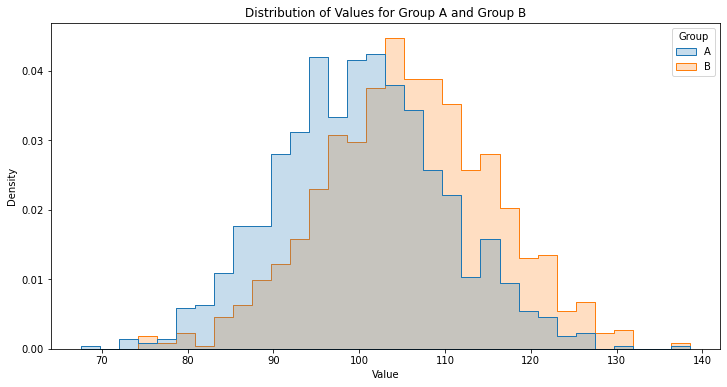

        count        mean       std        min        25%         50%  \
Group                                                                   
A      1000.0  100.193321  9.792159  67.587327  93.524097  100.253006   
B      1000.0  105.708362  9.974544  75.596114  98.937583  105.630771   

              75%         max  
Group                          
A      106.479439  138.527315  
B      112.288822  136.931076  
T-statistic: -12.477026028717471
P-value: 1.8492169348407711e-34
Reject the null hypothesis: There is a significant difference between the two groups.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Simulate some data for the A/B test
np.random.seed(42)

# Group A: Control group
group_a = np.random.normal(loc=100, scale=10, size=1000)  # mean=100, std=10, size=1000

# Group B: Treatment group
group_b = np.random.normal(loc=105, scale=10, size=1000)  # mean=105, std=10, size=1000

# Create a DataFrame
data = pd.DataFrame({
    'Group': ['A']*len(group_a) + ['B']*len(group_b),
    'Value': np.concatenate([group_a, group_b])
})

# Visualize the data
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Value', hue='Group', element='step', stat='density', common_norm=False)
plt.title('Distribution of Values for Group A and Group B')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Summary statistics
summary_stats = data.groupby('Group')['Value'].describe()
print(summary_stats)

# Conduct a two-sample t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Actionable insights
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")
